<a href="https://colab.research.google.com/github/hoanglam372000/Applied-Data-Science-Group-7/blob/main/Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Báo cáo đồ án môn "Khoa học dữ liệu ứng dụng"

Nhóm 7:
1. 18120429 – Phạm Trung Kiên - trungkien2000
2. 18120431 – A Ly Ha Kim - kim-ali
3. 18120434 – Thái Hoàng Lâm - hoanglam372000
4. 18120462 – Nguyễn Thị Mận - ManCB26
Link thùng chứa Github của nhóm: \
https://github.com/hoanglam372000/Applied-Data-Science-Group-7

# I. Mô tả bài toán: 
## 1. Mô tả:
Link: https://www.kaggle.com/c/tweet-sentiment-extraction \

- Bài toán thuộc lĩnh vực NLP, cụ thể là bài toán phân tích cảm xúc (Sentiment Analysis)
- Không giống như những bài toán phân tích cảm xúc khác chỉ dừng ở việc phân lớp, bài toán yêu cầu phải rút trích những từ ngữ trong câu đóng góp cho cảm xúc tương ứng. Vì vậy, đây là thách thức mới
- Ví dụ: "I am happy": positive -> "happy" \
=> Input của bài toán: text và sentiment (positive,neutral, negative) tương ứng của text. Output là: các từ/ cụm từ/ câu đại diện sentiment cho text (như ví dụ bên trên: từ "happy" là từ đại diện cho sentiment "positive" cho câu)

## 2. Hướng giải quyết của nhóm 
Ban đầu nhóm định theo hướng giải quyết của người đứng hạng 3 trên private leaderboard, đó là sử dụng RoBerta, code bằng Pytorch. Nhóm đã cố gắng tìm hiểu nhưng do phần code tác giả không giải thích gì thêm và phần kiến thức vượt quá tầm tay của các thành viên trong nhóm. Vì vậy, nhóm quyết định giải quyết theo hướng khác và cuối cùng có áp dụng RoBerta bằng Keras.

- Đầu tiên, áp dụng phương pháp học thống kê, phân tích lỗi sai, rút ra một số luật bổ sung vào mô hình thống kê. \
- Thử áp dụng một số mô hình deep learning như: LSTM, LSTM + Attention. Tuy nhiên, các mô hình đều cho kết quả thấp dưới 0.6 \
- Tiếp tục, thử nghiệm với các mô hình "state-of-the-art": BERT (base), Roberta (base) \
- Sau cùng, do kết quả chưa được như mong đợi là 0.72 (top 20) nên nhóm cải thiện mô hình bằng cách tích hợp 2 mô hình Deep learning và thống kê, trong đó bao gồm: Bert + thống kê và RoBerta + thống kê. Kết quả sau cùng: Bert và thống kê đạt kết quả cao nhất trên tập test.






# II. Giải quyết bài toán và cài đặt:

**Tóm tắt các bước chính:** \

- Tiền xử lý và khám phá dữ liệu
- Mô hình hoá theo học thống kê
- Mô hình hoá theo deep learning
- Kết hợp 2 mô hình trên
- Dự đoán rút trích trên tập test
- Nộp bài 

- Kết quả: 0.6249 trên train, 0.6137 trên val


##1)  Lấy dữ liệu, Khám phá và tiền xử lý:






### 1.1 Download dữ liệu và import thư viện cần thiết:

In [1]:
# Lấy tập dữ liệu mà Kaggle cung cấp thông qua github (nhóm đã upload datasets lên github)
!git clone https://github.com/hoanglam372000/Applied-Data-Science-Group-7.git

Cloning into 'Applied-Data-Science-Group-7'...
remote: Enumerating objects: 188, done.
remote: Counting objects: 100% (188/188), done.
remote: Compressing objects: 100% (186/186), done.
remote: Total 188 (delta 102), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (188/188), 5.36 MiB | 4.61 MiB/s, done.
Resolving deltas: 100% (102/102), done.


In [2]:
# Cài đặt thư viện mà môi trường Google Colab không cài đặt sẵn
!pip install emoji        #Xử lý các emoji
!pip install transformers #Thư viện dùng cho các mô hình Deep learning: Bert, Roberta

     |████████████████████████████████| 170 kB 5.4 MB/s 
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169314 sha256=d6c301b669084392df25160baf1c21de7d828fef860fdd8eacc9645e271f9052
  Stored in directory: /root/.cache/pip/wheels/ea/5f/d3/03d313ddb3c2a1a427bb4690f1621eea60fe6f2a30cc95940f
Successfully built emoji
     |████████████████████████████████| 3.4 MB 5.3 MB/s 
     |████████████████████████████████| 61 kB 475 kB/s 
     |████████████████████████████████| 596 kB 47.9 MB/s 
     |████████████████████████████████| 3.3 MB 34.1 MB/s 
     |████████████████████████████████| 895 kB 35.6 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [3]:
# Import các thư viện cần thiết và download các tập dữ liệu bổ trợ cho thư viện NLTK
import math
import pandas as pd
import nltk
import numpy as np
import emoji
import re
import string
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import scipy.stats as st
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from keras.layers import *
from keras.models import Model
from keras.callbacks import ModelCheckpoint
pd.set_option('display.max_colwidth', 200)
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('names')
names = nltk.corpus.names.words('male.txt')+nltk.corpus.names.words('female.txt')
names_lower = [name.lower() for name in names]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.


### 1.2 Khám phá dữ liệu

In [4]:
# Đọc dữ liệu:
df = pd.read_csv('Applied-Data-Science-Group-7/train.csv')
test_df = pd.read_csv('Applied-Data-Science-Group-7/test.csv')

In [5]:
df

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on the releases we already bought","Sons of ****,",negative
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband lost his job and can`t afford it,d lost,negative
27477,4f4c4fc327,"I`ve wondered about rake to. The client has made it clear .NET only, don`t force devs to learn a new lang #agile #ccnet",", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - you probably need it after such hectic weekend Take care hun xxxx,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


In [6]:
# Thông tin tổng quan về tập train mà bài toán cung cấp:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


=> Cột text và selected_text tồn tại 1 giá trị NULL

In [7]:
# Xoá NULL
df.dropna(inplace = True)

### 1.3 Tách tập dữ liệu:

In [8]:
# Tách tập huấn luyện và tập validation theo tỉ lệ 70%:30%
X_df = df.drop(labels = 'selected_text',axis = 1)
y_ex = df.selected_text
y_class = df.sentiment
train_X_df, val_X_df, train_y_ex, val_y_ex = train_test_split(X_df, y_ex, test_size=0.3, 
                                                              stratify=y_class, random_state=0)

In [9]:
print('train_X: ',train_X_df.shape)
print('train_y: ',train_y_ex.shape)
print('val_X: ',val_X_df.shape)
print('val_y: ',val_y_ex.shape)


train_X:  (19236, 3)
train_y:  (19236,)
val_X:  (8244, 3)
val_y:  (8244,)


### 1.4 Khám phá và tiền xử lý tập train

#### 1.4.1 Khám phá tập train

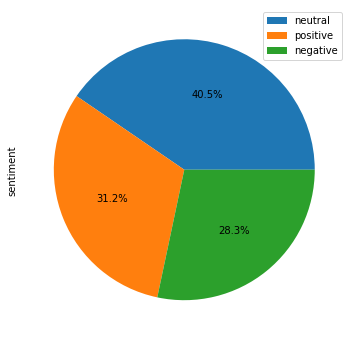

In [10]:
#Phân bố của các lớp:
train_X_df.sentiment.value_counts(normalize= True).plot(kind="pie",labels = None, legend='auto', figsize=(8,6), autopct="%.1f%%");

In [11]:
train_X_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19236 entries, 652 to 12238
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   textID     19236 non-null  object
 1   text       19236 non-null  object
 2   sentiment  19236 non-null  object
dtypes: object(3)
memory usage: 601.1+ KB


In [12]:
# Kiểm tra xem các dòng có trùng hay không?
train_X_df.duplicated().sum()

0

In [13]:
# Kiểm tra cột output có null hay không?
train_y_ex.isnull().sum()

0

#### 1.4.2 Tiền xử lý cột text

**Các bước tiền xử lý chính:**


1.   Xử lý vấn đề trùng lập các ký tự trong từ. Ví dụ: nooooo -> no (class RepeatReplacer):
- Sử dụng Regular Expression để loại bỏ các ký tự thừa.
- Tuy nhiên phải quét thêm qua wordnet để tránh trường hợp như từ **goose** bị chuyển thành gose (mặc dù **goose** là từ đúng)
- Tham khảo code trong sách: NLTK for Python 3 [1]
2.   Một số bước xử lý khác:
- Tách từ theo khoảng trắng
- Loại bỏ ký tự đặc biệt
- Emoji -> từ
- Chuyển số thành <NUMBER>,Link -> <URL>,*** -> <HIDDEN>,@ten -> <tag>,#ten -> <hash_tag>, ký tự đặc biệt khác -> <Special>
- Steming (Dancing, dancer ->danc)
- Lowercase
- Mapping nhãn (positive: 1, neutral:0, negative: -1)




In [15]:
stemmer = PorterStemmer()
class RepeatReplacer(object):
    def __init__(self):
        self.repeat_regexp = re.compile(r'(\w*)(\w)\2(\w*)')
        self.repl = r'\1\2\3'
    def replace(self, word):
        if wordnet.synsets(word):
            return word
        repl_word = self.repeat_regexp.sub(self.repl, word)
        if repl_word != word:
            return self.replace(repl_word)
        else:
            return repl_word
char_repeat_correct = RepeatReplacer()

def preprocessing_word(word,_stem =False):
  '''
      Hàm tiền xử lý từ
      Input:
       + word: 1 từ dạng str
       + _stem: có sử dụng stem hay không, mặc định là không (dancing -> danc)
       Output: từ đã được làm sạch
  '''
  if word != emoji.demojize(word):
    return emoji.demojize(word)
  
  temp=[ "html_tag",'URL','HIDDEN','tag',"hash_tag"]
  if word in temp:
    return word
  #số theo từ
  if word.isdigit():  
    return 'NUMBER'
  try: 
    float(word)
    return 'NUMBER'
  except:
    pass

  word = re.sub(pattern=r'["!\.#$%&\'()*+-/:;<=>@\?\[\]^_`{|}~0-9ï¿½]+', repl='', string=word)
  word = char_repeat_correct.replace(word)
  if _stem == True:
    word = stemmer.stem(word)
  word = word.lower()
  
  if word==''or word ==' ':
    return "Special"
  

  return word.replace(' ','_')

def preprocessing_text(tweet,sentiment,_stem = False):
   ''''
      Hàm tiền xử lý 1 tweet
      Input:
        tweet: str
        sentiment: int 
        _stem: bool
      Output: 1 tweet đã làm sạch (str)
   '''
   raw_text = str(tweet).strip().replace('\n', ' ')#.lower()
   # emoij
   raw_text=emoji.demojize(raw_text)
   e_r=r':\w+_\w+:'
   emoij_list=re.findall(e_r,raw_text)
   for e in emoij_list:
     raw_text=raw_text.replace(e,' ' + emoji.emojize(e) + ' ') # "hi❤️👍"
   if sentiment !=0: 
     raw_text = re.sub(pattern=r'(?<=\w)(\.){2,}?(?=\w)', repl=' ', string=raw_text)
   new_tweet = raw_text.split()
   len_=len(new_tweet)
   index2word = { w:new_tweet[w] for w in range(len_)}
   raw_text = re.sub(pattern=r'https?://\S+|www\.\S+', repl='URL', string=raw_text)
   raw_text = re.sub(pattern='\*{3,}?', repl='HIDDEN', string=raw_text)
   raw_text = re.sub(pattern=r'@\w+', repl='tag', string=raw_text)
   raw_text = re.sub(pattern=r'#\w+', repl='hash_tag', string=raw_text)
   
   word_list=raw_text.split()
   return index2word,{  i:preprocessing_word(word,_stem) for i,word in enumerate(word_list)}

In [16]:
# Test:
tweet = ' My mom just texted.......me and told *ship* James that Rodney3 charlie wasï¿½ *** chasing?? and fireflies... in their :)) backyard. Awwwww I`m miss him!!! @hoanglam 123 ://    http://twitpic.com/66pn1'
tweet2 = 'nooooooooo'
index2word_temp,preprocessed_tweet_temp = preprocessing_text(tweet,1,_stem = False)
print('index2word: ',index2word_temp)
print('preprocessed_tweet: ',preprocessed_tweet_temp)

index2word:  {0: 'My', 1: 'mom', 2: 'just', 3: 'texted', 4: 'me', 5: 'and', 6: 'told', 7: '*ship*', 8: 'James', 9: 'that', 10: 'Rodney3', 11: 'charlie', 12: 'wasï¿½', 13: '***', 14: 'chasing??', 15: 'and', 16: 'fireflies...', 17: 'in', 18: 'their', 19: ':))', 20: 'backyard.', 21: 'Awwwww', 22: 'I`m', 23: 'miss', 24: 'him!!!', 25: '@hoanglam', 26: '123', 27: '://', 28: 'http://twitpic.com/66pn1'}
preprocessed_tweet:  {0: 'my', 1: 'mom', 2: 'just', 3: 'texted', 4: 'me', 5: 'and', 6: 'told', 7: 'ship', 8: 'james', 9: 'that', 10: 'rodney', 11: 'charlie', 12: 'was', 13: 'HIDDEN', 14: 'chasing', 15: 'and', 16: 'fireflies', 17: 'in', 18: 'their', 19: 'Special', 20: 'backyard', 21: 'aw', 22: 'im', 23: 'miss', 24: 'him', 25: 'tag', 26: 'NUMBER', 27: 'Special', 28: 'URL'}


In [17]:
# Tiền xử lý toàn bộ cột text:
def preprocess_tweets(X_df,_stem = False):
  '''
  Tiền xử lý toàn bộ cột text trong tập dữ liệu
  Input:
    + X_df: DataFrame 
    +_stem: bool
  Output: 2 DataFrame:
   1 Df dạng các dòng là dictionary
   1 Df dạng các dòng là 1 chuỗi
  '''
  X_df = X_df.copy()
  raw_tweets = X_df.text.to_list()
  X_df.sentiment = X_df.sentiment.map({'negative':-1,'neutral':0,'positive':1})
  index2word_tweets = [] #list of dictionaries
  preprocessed_tweets = [] #list of dictionaries
  cleaned_texts = []
  for tweet,senti in zip(raw_tweets,X_df.sentiment.to_list()):
    index2word, preprocessed = preprocessing_text(tweet,senti,_stem)
    index2word_tweets.append(index2word)
    preprocessed_tweets.append(preprocessed)
    cleaned_texts.append(' '.join(list(preprocessed.values())))
  preprocessed_X_df = pd.DataFrame(data={'textID':X_df.textID,'index2word':index2word_tweets, 'preprocessed_texts':preprocessed_tweets,'sentiment':X_df.sentiment})
  cleaned_int2text_df = pd.DataFrame(data={'textID':X_df.textID,'Raw_text':X_df.text, 'Cleaned_texts':cleaned_texts,'sentiment':X_df.sentiment})
  return preprocessed_X_df,cleaned_int2text_df

#Tiền xử lý cột output
def _preprocessed_y_ex(X_df,y_ex,_stem = False):
  preprocessed_y_ex = []
  X_df = X_df.copy()
  cleaned_texts = []
  for tweet,senti in zip(y_ex.to_list(),X_df.sentiment.to_list()):
      index2word, preprocessed_y = preprocessing_text(tweet,senti,_stem)
      preprocessed_y_ex.append(preprocessed_y)
      cleaned_texts.append(' '.join(list(preprocessed_y.values())))

  X_df['sentiment'] = X_df.sentiment.map({'negative':-1,'neutral':0,'positive':1}).to_list()
  return pd.DataFrame(data = {'preprocessed_texts': preprocessed_y_ex,'Cleaned_text': cleaned_texts,'sentiment':X_df.sentiment})



In [18]:
#Test:
preprocessed_X_df_temp,cleaned_int2text_df_temp = preprocess_tweets(train_X_df.head(100))
preprocessed_X_df_temp

,textID,index2word,preprocessed_texts,sentiment
652,a834cef9c6,"{0: '1st', 1: 'presentation', 2: 'for', 3: 'senior', 4: 'boards?', 5: 'FML'}","{0: 'st', 1: 'presentation', 2: 'for', 3: 'senior', 4: 'boards', 5: 'fml'}",-1
24883,5bfad683d5,"{0: 'yummy', 1: 'curry', 2: 'save', 3: 'me', 4: 'some', 5: 'please', 6: 'lol'}","{0: 'yummy', 1: 'curry', 2: 'save', 3: 'me', 4: 'some', 5: 'please', 6: 'lol'}",1
15385,08a8d660b1,"{0: 'I', 1: 'wish', 2: 'I', 3: 'knew', 4: 'someone', 5: 'down', 6: 'there', 7: 'who', 8: 'could', 9: 'hook', 10: 'us', 11: 'up.', 12: 'a', 13: 'friend', 14: 'told', 15: 'me', 16: 'once', 17: 'that...","{0: 'i', 1: 'wish', 2: 'i', 3: 'knew', 4: 'someone', 5: 'down', 6: 'there', 7: 'who', 8: 'could', 9: 'hook', 10: 'us', 11: 'up', 12: 'a', 13: 'friend', 14: 'told', 15: 'me', 16: 'once', 17: 'that'...",-1
16753,99a0ff3bef,"{0: 'Lucky', 1: 'u', 2: 'Im', 3: 'stuck', 4: 'in', 5: 'the', 6: 'rain...'}","{0: 'lucky', 1: 'u', 2: 'im', 3: 'stuck', 4: 'in', 5: 'the', 6: 'rain'}",0
19,40e7becabf,"{0: 'Hes', 1: 'just', 2: 'not', 3: 'that', 4: 'into', 5: 'you'}","{0: 'hes', 1: 'just', 2: 'not', 3: 'that', 4: 'into', 5: 'you'}",0
...,...,...,...,...
16799,82d211bdd5,"{0: 'i', 1: 'think', 2: 'i', 3: 'hate', 4: 'you.', 5: 'i', 6: 'didnt', 7: 'really', 8: 'want', 9: 'to', 10: 'but', 11: 'you', 12: 'make', 13: 'it', 14: 'hard', 15: 'for', 16: 'me', 17: 'to', 18: '...","{0: 'i', 1: 'think', 2: 'i', 3: 'hate', 4: 'you', 5: 'i', 6: 'didnt', 7: 'really', 8: 'want', 9: 'to', 10: 'but', 11: 'you', 12: 'make', 13: 'it', 14: 'hard', 15: 'for', 16: 'me', 17: 'to', 18: 'l...",-1
6706,7a775cc933,"{0: 'If', 1: 'I', 2: 'were', 3: 'a', 4: 'transformer...', 5: 'I`d', 6: 'step', 7: 'on', 8: 'people', 9: 'just', 10: 'to', 11: 'hear', 12: 'them', 13: '*squoosh*.', 14: 'But', 15: 'I`m', 16: 'not',...","{0: 'if', 1: 'i', 2: 'were', 3: 'a', 4: 'transformer', 5: 'id', 6: 'step', 7: 'on', 8: 'people', 9: 'just', 10: 'to', 11: 'hear', 12: 'them', 13: 'squosh', 14: 'but', 15: 'im', 16: 'not', 17: 'so'...",0
1967,127ac4d1d2,"{0: 'ohay', 1: 'clean', 2: 'teeth'}","{0: 'ohay', 1: 'clean', 2: 'teeth'}",1
9181,4b8cb4449b,"{0: 'Im', 1: 'fine', 2: 'also..up', 3: 'way', 4: 'to', 5: 'early..lol...soo', 6: 'those', 7: 'r', 8: 'all', 9: 'ur', 10: 'dogs?', 11: 'to', 12: 'kut3', 13: '..i', 14: 'def', 15: 'want', 16: 'a', 1...","{0: 'im', 1: 'fine', 2: 'alsoup', 3: 'way', 4: 'to', 5: 'earlylolso', 6: 'those', 7: 'r', 8: 'all', 9: 'ur', 10: 'dogs', 11: 'to', 12: 'kut', 13: 'i', 14: 'def', 15: 'want', 16: 'a', 17: 'pit', 18...",0


## 2) Mô hình hoá dữ liệu:

### 2.1 Học thống kê:

**Các bước chính**
- Tiền xử lý và khám phá dữ liệu
- Xây dựng từ điển tần suất theo sentiment
- Xây dựng Bag-of-word theo xác suất Naive-Bayes
- Trích text bằng likelihood của bước trên và ước lượng ngưỡng
- Ánh xạ text đã rút trích về nguyên mẫu của từng từ trong text (đề yêu cầu)
- Đánh giá bằng độ đo Jaccard Similarity
- Tunning trên tập val để tìm các siêu tham số tốt nhất

#### 2.1.1 Tiền xử lý đầu vào cho mô hình:

In [19]:
# tiền xử lý cho mô hình 
preprocessed_train_X, cleaned_train_X = preprocess_tweets(train_X_df,_stem = True)
preprocessed_train_y_ex = _preprocessed_y_ex(train_X_df,train_y_ex,_stem = True)
preprocessed_val_X, cleaned_val_X = preprocess_tweets(val_X_df,_stem = True)
preprocessed_val_y_ex = _preprocessed_y_ex(val_X_df,val_y_ex, _stem = True)

#### 2.1.2 Xây dựng mô hình:

Ý tưởng cho xử lý phủ định

- Xét từ phía trước nằm trong tập negative forms bên trên, nếu từ tiếp theo mang nghĩa positive thì trích nguyên cụm: negative form + positive word -> negative phrase \\
- Ví dụ: not + good -> not good -> negative




In [20]:
# Xử lý phủ định dựa trên kinh nghiệm:
negative_form = ['not','dont','doesnt','arent','isnt','havent','hasnt','didnt','wasnt','werent','hadnt','wont','shant','cant',\
'couldnt','neitheir','nor','rarely','hardly','seldom','never','no']
#negative_form

In [21]:
class sentiment_word_extraction(BaseEstimator, TransformerMixin):
    def __init__(self, k = 5,z_neg=1.65,z_neu = 1.65,z_pos=1.65,w =1, vob_threshold = 2):
          '''
             Khởi tạo các siêu tham số:
              k: hệ số làm mịn
              z_neg, z_neu,z_pos: các siêu tham số tương ứng với các class: negative, neutral, positive.
              Các tham số trên được rút ra từ kinh nghiệm trong quá trình chạy để rút trích sentiment word theo class được tốt nhất có thể.
              w: trọng số rút trích, cũng được rút ra từ kinh nghiệm trong quá trình chạy
              vob_threshold: ngưỡng tần suất tối thiểu xuất hiện của một từ vựng, từ nào dưới ngưỡng sẽ được biểu diễn bằng "<OOV>"
            '''
          self.k = k
          self.z_neg = z_neg
          self.z_neu = z_neu
          self.z_pos = z_pos
          self.vob_threshold = vob_threshold
          self.w = w

    def word2freqs(self,preprocessed_X):
        '''
             Hàm biểu diễn 1 từ theo số lần xuất hiện của nó trong toàn bộ tập dữ liệu
             Input: 
                preprocessed_X: DataFrame
              Output: vob2freq (dictionary)
        '''
        preprocessed_tweets = preprocessed_X.preprocessed_texts.to_list()
        list_of_tweets = [list(text.values()) for text in preprocessed_tweets ]
        vob2freq = {}
        for tw in list_of_tweets:
            for word in tw:
              if vob2freq.get(word,0) !=0:
                  vob2freq[word] +=1
              else:
                  vob2freq[word] = 1
        return vob2freq
    def count_tweets(self,preprocessed_X):
        '''
              Hàm biểu diễn tần suất của từ theo sentiment
              Ví dụ: {('happi',1): 1000, ('happi',-1):1,('happi',0): 100}
            Input:
                preprocessed_X: Dataframe
            Output:
              freqs: dictionary
        '''
        preprocessed_X = preprocessed_X.copy()
        y_s = preprocessed_X.sentiment.to_list()
        preprocessed_tweets = preprocessed_X.preprocessed_texts.to_list()
        processed_tweets = [list(text.values()) for text in preprocessed_tweets ]


        vob2freqs = self.word2freqs(preprocessed_X)
        freqs = {}

        for y, tweet in zip(y_s, processed_tweets):
            for word in tweet:
                if vob2freqs[word] < self.vob_threshold and y==0:
                    pair = ('<OOV>',y)
                else:

                    # define the key, which is the word and label tuple
                    pair = (word,y)

              # if the key exists in the dictionary, increment the count
                if pair in freqs:
                    freqs[pair] += 1

              # else, if the key is new, add it to the dictionary and set the count to 1
                else:
                    freqs[pair] = 1

        return freqs
    
    def bayes_likelihood(self,freqs,preprocessed_X,preprocessed_y_ex,score_sentiment = True):
        '''
          Hàm biểu diễn 1 từ theo dạng Bag-of-word
          Mỗi từ sẽ được biểu diễn bởi 1 vector 3 phần tử: [negative_score,neutral_score,positive_score]
            Input:
                freqs: dictionary from (word, label) to how often the word appears
                preprocessed_X: dataframe
                preprocessed_y_ex: cột output gồm những từ được rút trích, dùng làm trọng số cho vector biểu diễn từ.
                score_sentiment: bool, ý nghĩa: có dùng preprocessed_y_ex làm trọng số rút trích hay không
            Output:
                likelihood
        '''
        likelihood = {}
        preprocessed_X = preprocessed_X.copy()
        train_y = preprocessed_X.sentiment.to_list()
        preprocessed_tweets = preprocessed_X.preprocessed_texts.to_list()
        #train_x = [list(text.values()) for text in preprocessed_tweets ]
    

        # calculate V, the number of unique words in the vocabulary
        vocab = set([pair[0] for pair in freqs.keys()])
        vocabs_ = list(vocab)

        V = len(vocab)

        # calculate N_pos and N_neg
        N_pos = N_neg = N_neu = 0
        for pair in freqs.keys():
            if pair[1] ==1:
                  N_pos += freqs[pair]
            elif pair[1] ==0:
                  N_neu += freqs[pair]
            else:
                  N_neg += freqs[pair]

          # Calculate D, the number of documents
        D = len(train_y)

        for word in vocab:
          # get the positive and negative frequency of the word
            freq_pos = freqs.get((word,1),0)
            freq_neu = freqs.get((word,0),0)
            freq_neg = freqs.get((word,-1),0)
        

          # calculate the probability that each word is positive, and negative , neutral
            p_w_pos = (freq_pos + self.k) / (N_pos + self.k*V)
            p_w_neu = (freq_neu + self.k) / (N_neu + self.k*V)
            p_w_neg = (freq_neg + self.k) / (N_neg + self.k*V)

          # calculate the likelihood of the word
         
            likelihood[word] = [p_w_neg,p_w_neu,p_w_pos]

        def lexical_sentiment_score(preprocessed_y_ex,x_likelihood):
            y_freqs = self.count_tweets(preprocessed_y_ex)
            new_x_likelihood = {}
            for w,l in x_likelihood.items():
                new_x_likelihood[w] = l
                if y_freqs.get((w,-1),0)!=0:
                    #new_x_likelihood[w][0] = np.log((1/(-new_x_likelihood[w][0]- math.pow(10,-10))) * y_freqs[(w,-1)] )
                    new_x_likelihood[w][0] = l[0]*(y_freqs[(w,-1)])*self.w
                if y_freqs.get((w,0),0)!=0:
                    #new_x_likelihood[w][0] = np.log((1/(-new_x_likelihood[w][1] - math.pow(10,-10)  ))* y_freqs[(w,0)]  )
                    new_x_likelihood[w][1] = l[1]*(y_freqs[(w,0)])*self.w
                if y_freqs.get((w,1),0)!=0:
                    #new_x_likelihood[w][0] = np.log((1/(-new_x_likelihood[w][2]- math.pow(10,-10))) * y_freqs[(w,1)] )
                    new_x_likelihood[w][2] = l[2]*(y_freqs[(w,1)])*self.w
            return new_x_likelihood
        if score_sentiment:
           likelihood = lexical_sentiment_score(preprocessed_y_ex,likelihood)
        return vocabs_, likelihood

           
    def sentiment_word_net(self,likelihood):
          word2sentiment = {}
          for w,score in likelihood.items():
             max_prob = max(score)
             word2sentiment[w] = score.index(max_prob) -1
            #  if ((score[2]/ score[0]) > 1) and ((score[2]/score[0]) > (score[1]/score[2])):
            #    word2sentiment[w] = 1
            #  elif (score[0]/score[2]) >1 and ((score[0]/score[2]) > (score[1]/score[0])):
            #    word2sentiment[w] = -1 
          return word2sentiment

    def Extract_Sentiment_Tweet(self,x_class,tweet):
        '''input:
                tweet: list of word'''
        selected_tweet = {}
        s = x_class +1
        for i,word in tweet.items():    
            if s==1:
              #for word in tweet:
                if self.likelihood.get(word,0) !=0:
                    neg_prob,neu_prob,pos_prob = self.likelihood[word]
                    threshold = 1+self.z_neu
                    #if ((neg_prob/neu_prob) < 1 + self.z_neu) or ((pos_prob/neu_prob) < 1+ self.z_neu):
                    selected_tweet[i] = word
                else:
                   selected_tweet[i] = word
            elif s==2:
    
            #for word in tweet:
                if self.likelihood.get(word,0) !=0 and len(word) >1:
                  neg_prob,neu_prob,pos_prob = self.likelihood[word]
                  max_prob = max(self.likelihood[word])
                  if self.likelihood[word].index(max_prob) == s:
                      if abs(max_prob -neu_prob) > self.z_pos:
                    #if max_prob/neu_prob > self.z_pos:
                          selected_tweet[i] = word
            else:
                  if self.likelihood.get(word,0) !=0 and len(word) >1:
                    max_prob = max(self.likelihood[word])
                    neg_prob,neu_prob,pos_prob = self.likelihood[word]
                    if i != 0:
                        if self.word2sentiment.get(tweet[i] ,-2)== 1 and tweet[i-1] in negative_form:
                          selected_tweet[i-1] = tweet[i-1]
                          selected_tweet[i] = tweet[i]

                    if self.word2sentiment[word] == -1:
                            if abs(max_prob -neu_prob) > self.z_neg:
                              selected_tweet[i] = word

                
        return selected_tweet

    
    def Predict_Extract_text(self,Preprocessed_X):
        selected = []
        preprocessed_X = Preprocessed_X.copy()
        y_s = preprocessed_X.sentiment.to_list()
        preprocessed_tweets = preprocessed_X.preprocessed_texts.to_list()
        #tweets = [list(text.values()) for text in preprocessed_tweets ]
        for y, tweet in zip(y_s,preprocessed_tweets ):
            #selected_predict = Extract_Sentiment_Tweet(y,tweet,likelihood)
            selected_predict = self.Extract_Sentiment_Tweet(y,tweet)
            selected.append(selected_predict)
        return selected # dictionary

    
           
    def Map_Extracted(self,Preprocessed_X,extracted_texts):
        index2word = Preprocessed_X.index2word.to_list()
        Selected_text = []
        for ex_tweet,origin_text in zip(extracted_texts,index2word):
            ex_text = []
            for k in ex_tweet.keys():
                
                ex_text.append(origin_text[k])
            Selected_text.append(' '.join(ex_text))
        return Selected_text
    
    def Map_Extracted_DL(self,Preprocessed_X,extracted_texts):
        index2word = Preprocessed_X.index2word.to_list()
        preprocessed_texts = Preprocessed_X.preprocessed_texts.to_list()
        Selected_text = []
        for e,i,p in zip(extracted_texts,index2word,preprocessed_texts):
            Text = {}
            for j in p.items():
              for w in e:
                if w == j[1]:
                  Text[j[0]] = i[j[0]]
            temp_text = {v:i for i,v in Text.items()}
            Selected_text.append(" ".join(list(temp_text.keys())))         
        return Selected_text
    

    def jaccard(self,str1, str2): 
        a = set(str1.lower().split()) 
        b = set(str2.lower().split())
        c = a.intersection(b)
        return float(len(c)) / (len(a) + len(b) - len(c))

    def fit(self, preprocessed_X_df, preprocessed_y_ex):
        self.freqs = self.count_tweets(preprocessed_X_df)
        self.vocabs, self.likelihood = self.bayes_likelihood(self.freqs,preprocessed_X_df,preprocessed_y_ex)
        self.word2sentiment = self.sentiment_word_net(self.likelihood)
        return self

    def transform(self, preprocessed_X_df):
        self.extracted_text = self.Predict_Extract_text(preprocessed_X_df)
        selected_text = self.Map_Extracted(preprocessed_X_df,self.extracted_text)
        return selected_text

    def score(self,selected_text,y_ex):
        score = 0
        y_true_s = y_ex.copy().to_list()
        for y_pred, y_true in zip(selected_text,y_true_s):
            score += self.jaccard(str(y_true),y_pred)
        return score/len(y_true_s)

#### 2.1.3 Training

In [22]:
# Training
tse_st = sentiment_word_extraction(z_pos= 0.00003,z_neu=4,z_neg = 0.00003,vob_threshold=2,k = 10)
selected_train_X = tse_st.fit_transform(preprocessed_train_X,preprocessed_train_y_ex)
#selected_train_X = tse_st.extract(preprocessed_train_X)
tse_st.score(selected_train_X,train_y_ex)



0.6269111576643561

#### 2.1.4 Validation

In [23]:
# Test on val
selected_val_X = tse_st.transform(preprocessed_val_X)
tse_st.score(selected_val_X,val_y_ex)

0.6180272027588651

#### 2.1.5 Tunning

In [24]:
# Tunning
vob_thresholds = [2,3,4,5,6]
k_s = [1,2,5,7,10,12,15]
Val_score = {}
Train_score = {}

for k in k_s:

    for thres in vob_thresholds:
      model = sentiment_word_extraction(k=k,vob_threshold = thres,z_pos = 0.00003,z_neg = 0.00003, z_neu=4 )
      selected_train_text= model.fit_transform(preprocessed_train_X,preprocessed_train_y_ex)
      score_train = model.score(selected_train_text,train_y_ex)
      Train_score[score_train] = (k,thres)
      selected_val_X = model.transform(preprocessed_val_X)
      score_val = model.score(selected_val_X,val_y_ex)
      Val_score[score_val] = (k,thres)

best_train_score = max(list(Train_score.keys()))
best_val_score = max(list(Val_score.keys()))
best_k,best_vob_thres = Val_score[best_val_score]
print('best_train_score: ',best_train_score)
print('best_val_score: ',best_val_score)
print(f'best_k: {best_k} \n best_vob_thres: {best_vob_thres }')


best_train_score:  0.6287401963159893
best_val_score:  0.6185919923684143
best_k: 10 
 best_vob_thres: 6


=> Các siêu tham số tốt nhất cho mô hình thống kê:
- k =10
- vob_threshold = 6

### 2.2 Deep learning (BERT + RoBerta)

#### 2.2.1 Tóm tắt kết quả một số mô hình Deep learning:

Dùng LSTM:
+ Train: 0.548
+ Val: 0.489 \

Dùng LSTM + Attention: \
+ Train: 0.5868
+ Val: 0.555 \

Dùng BERT:
+ Train: 0.664
+ Val: 0.596 \

=> Cách tiếp cận mới của nhóm: dùng tích hợp mô hình học thống kê và BERT \
+ Train: 0.667
+ Val: 0.651
=> Vì vẫn chưa cao bằng tác giả (top 3) => giải pháp cuối cùng là dùng RoBERTa (sẽ fine-tune các thứ -> khá tốn thời gian)



#### 2.2.2 BERT + RoBerta

(Trong đó sử dụng BERT là chủ yếu, Roberta để ở dạng comment)

##### 2.2.2.1 Tiền xử lý đầu vào:

In [25]:
# Tiền xử lý dữ liệu cho mô hình deep learning
preprocessed_train_X_dl, cleaned_train_X_dl = preprocess_tweets(train_X_df,_stem = False)
preprocessed_train_y_ex_dl = _preprocessed_y_ex(train_X_df,train_y_ex,_stem = False)
preprocessed_val_X_dl, cleaned_val_X_dl = preprocess_tweets(val_X_df,_stem = False)
preprocessed_val_y_ex_dl = _preprocessed_y_ex(val_X_df,val_y_ex,_stem = False)

In [26]:

import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
from transformers import BertTokenizer, BertModel
from transformers import AutoTokenizer
from keras.models import Model
from keras.callbacks import ModelCheckpoint
#tokenizer = BertTokenizer.from_pretrained('../input/pretrained-bert-including-scripts/uncased_L-12_H-768_A-12/uncased_L-12_H-768_A-12/vocab.txt')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')


Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [27]:
from tqdm import tqdm
from tqdm.notebook import tqdm_notebook
tqdm_notebook.pandas()
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tqdm import tqdm

In [28]:
MAX_LEN=92
count = cleaned_train_X_dl.shape[0]
input_ids = np.zeros((count,MAX_LEN),dtype='int32')
attention_mask = np.zeros((count,MAX_LEN),dtype='int32')
start_tokens = np.zeros((count,MAX_LEN),dtype='int32')
end_tokens = np.zeros((count,MAX_LEN),dtype='int32')

In [29]:
x_train_bert = cleaned_train_X_dl.copy()
x_train_bert.sentiment = x_train_bert.sentiment.map({0:'neutral',1:'positive',-1:'negative'})

In [30]:
count_st = 0
count_ed = 0
for i,each in tqdm(enumerate(x_train_bert.values)):

  val = tokenizer.encode_plus(each[3],each[2],add_special_tokens=True,max_length=92,return_attention_mask=True,pad_to_max_length=True,return_tensors='tf',verbose=False)
  input_ids[i] = val['input_ids']
  attention_mask[i] = val['attention_mask']
  res = (tokenizer.encode(preprocessed_train_y_ex_dl.Cleaned_text.values[i]))
  res = res[1:-1] # to ignore <s> and </s>
  try:
    st = tf.where(val['input_ids']==res[0]).numpy()[0][1]
  except:
    st = 3
    count_st +=1
  start_tokens[i][st]=1
  try:
    ed = tf.where(val['input_ids']==res[-1]).numpy()[0][1]
  except:
    ed = tf.where(val['input_ids']==0).numpy()[0][1]
    count_ed +=1
  end_tokens[i][ed]=1 

19236it [01:03, 303.88it/s]


In [31]:
tokenizer.decode([101, 4997,  102, 2358, 8312, 2005, 3026, 7923, 4718, 2140,  102])

'[CLS] negative [SEP] st presentation for senior boards fml [SEP]'

In [32]:
input_ids.shape,attention_mask.shape,start_tokens.shape,end_tokens.shape

((19236, 92), (19236, 92), (19236, 92), (19236, 92))

In [33]:
# Tập val
MAX_LEN=92
count = cleaned_val_X_dl.shape[0]
input_ids_val = np.zeros((count,MAX_LEN),dtype='int32')
attention_mask_val = np.zeros((count,MAX_LEN),dtype='int32')
start_tokens_val = np.zeros((count,MAX_LEN),dtype='int32')
end_tokens_val = np.zeros((count,MAX_LEN),dtype='int32')

In [34]:
x_val_bert = cleaned_val_X_dl.copy()
x_val_bert.sentiment = x_val_bert.sentiment.map({0:'neutral',1:'positive',-1:'negative'})

In [35]:
#x_val_bert.values

In [36]:
count_st_val = 0
count_ed_val = 0
for i,each in tqdm(enumerate(x_val_bert.values)):

  val = tokenizer.encode_plus(each[3],each[2],add_special_tokens=True,max_length=92,return_attention_mask=True,pad_to_max_length=True,return_tensors='tf',verbose=False)
  input_ids_val[i] = val['input_ids']
  attention_mask_val[i] = val['attention_mask']
  res = (tokenizer.encode(preprocessed_val_y_ex.Cleaned_text.values[i]))
  res = res[1:-1] # to ignore <s> and </s>
  try:
    st = tf.where(val['input_ids']==res[0]).numpy()[0][1]
  except:
    st = 3
    count_st_val +=1
  start_tokens_val[i][st]=1
  try:
    ed = tf.where(val['input_ids']==res[-1]).numpy()[0][1]
  except:
    ed = tf.where(val['input_ids']==0).numpy()[0][1]
    count_ed_val +=1
  end_tokens_val[i][ed]=1 

8244it [00:26, 309.32it/s]


In [37]:
input_ids_val.shape,attention_mask_val.shape,start_tokens_val.shape,end_tokens_val.shape

((8244, 92), (8244, 92), (8244, 92), (8244, 92))

Nếu thầy muốn dùng Roberta thì có thể sử dụng phần code được comment dưới đây

In [38]:
# from transformers import TFRobertaForQuestionAnswering
# roberta = TFRobertaForQuestionAnswering.from_pretrained('roberta-base')

In [39]:
from transformers import TFBertForQuestionAnswering
bert_model = TFBertForQuestionAnswering.from_pretrained('bert-base-cased')

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/502M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFBertForQuestionAnswering.

Some layers of TFBertForQuestionAnswering were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['qa_outputs']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


##### 2.2.2.2 Cài đặt mô hình

In [40]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Softmax,Dense,Activation,Dropout

In [41]:
input1 = Input(shape=(MAX_LEN,),name='input_id',dtype=tf.int32)
input2 = Input(shape=(MAX_LEN,),name='attention_mask',dtype=tf.int32)
# Uncomment dòng code dưới đây để chạy roberta
#outputs = roberta(input1,attention_mask = input2) 
outputs = bert_model(input1,attention_mask = input2) # Nếu chạy roberta thì comment dòng này
dense1 = Dense(units=MAX_LEN,activation='relu',name='dense1',kernel_regularizer = tf.keras.regularizers.L2(l2=0.0001))(outputs.start_logits)
drop1 = Dropout(0.4)(dense1)
dense2 = Dense(units=MAX_LEN,activation='relu',name='dense2',kernel_regularizer = tf.keras.regularizers.L2(l2=0.0001))(drop1)
softmax1 = Activation('softmax')(dense2)
dense3 = Dense(units=MAX_LEN,activation='relu',name='dense3',kernel_regularizer = tf.keras.regularizers.L2(l2=0.0001))(outputs.end_logits)
drop2 = Dropout(0.4)(dense3)
dense4 = Dense(units=MAX_LEN,activation='relu',name='dense4',kernel_regularizer = tf.keras.regularizers.L2(l2=0.0001))(drop2)
softmax2 = Activation('softmax')(dense4)

In [42]:
model = Model(inputs=[input1,input2],outputs=[softmax1,softmax2])

In [43]:
!gdown --id 1e-niIF8NMLKP8ejVphI6MyfBoqFYwnvE # download pretrained bert
#!gdown --id 1fOJjccftOkc-AIulbSsbVDMYsJB4SLQ9 # download pretrained roberta

Downloading...
From: https://drive.google.com/uc?id=1e-niIF8NMLKP8ejVphI6MyfBoqFYwnvE
To: /content/BERT_15_12.hdf5
100% 431M/431M [00:02<00:00, 152MB/s]


In [44]:
model.load_weights("BERT_15_12.hdf5")
#model.load_weights("roberta_model_3_1.hdf5")

In [45]:
#model = tf.keras.models.load_model('../input/final-bert-model-15-12/final_bert_model')
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_id (InputLayer)          [(None, 92)]         0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 92)]         0           []                               
                                                                                                  
 tf_bert_for_question_answering  TFQuestionAnswering  107721218  ['input_id[0][0]',               
  (TFBertForQuestionAnswering)  ModelOutput(loss=No               'attention_mask[0][0]']         
                                ne, start_logits=(N                                               
                                one, 92),                                                     

In [46]:
#[CLS] positive [SEP] I love you so much [SEP]

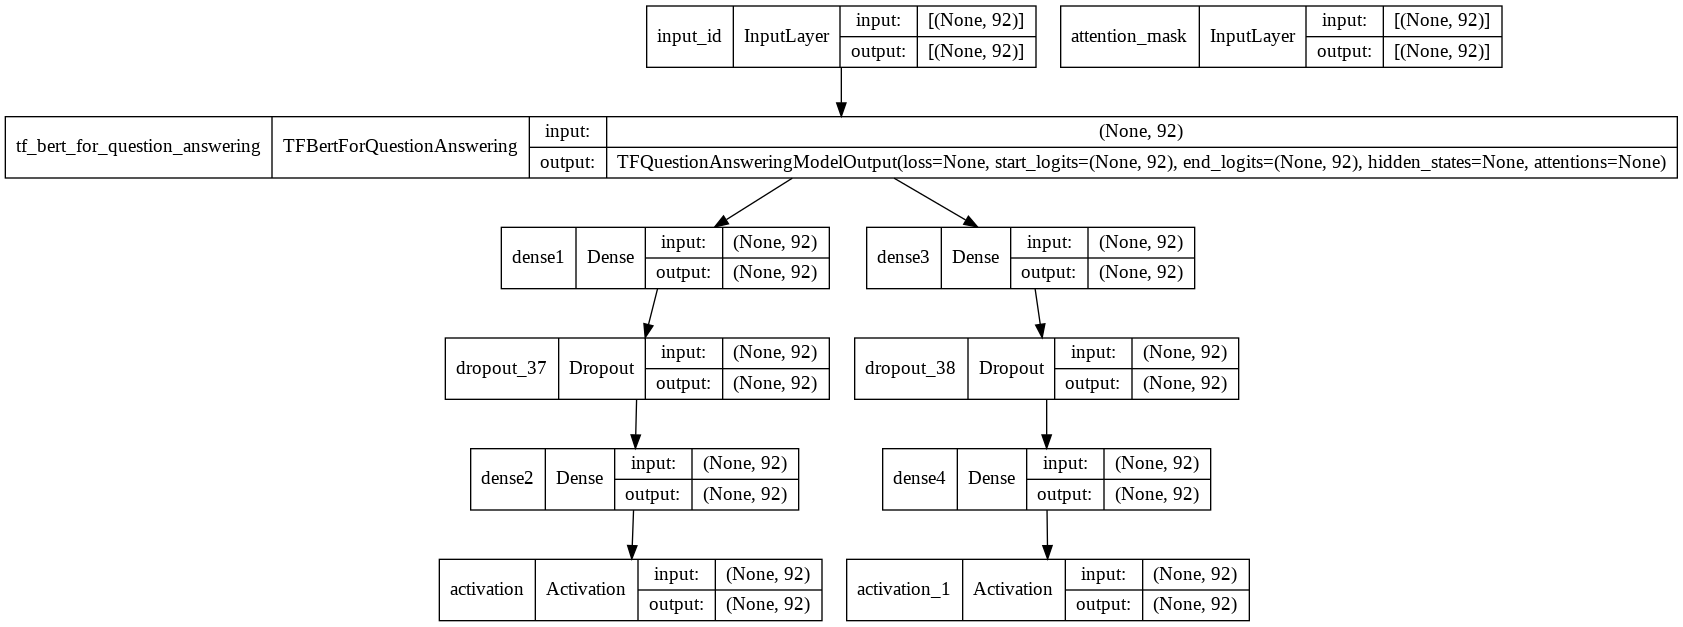

In [47]:
import tensorflow as tf
tf.keras.utils.plot_model(model, 'Model.png',show_shapes=True)

In [48]:
input_data = (input_ids,attention_mask)
output_data = (start_tokens,end_tokens)

val = (input_ids_val,attention_mask_val)
output_val = (start_tokens_val,end_tokens_val)
val_data = (val,output_val)

Note: Uncomment phần code dưới đây nếu muốn train lại mô hình

In [49]:

# %load_ext tensorboard
# import datetime
# import os
# #reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,patience=2,verbose=3,min_lr = 1e-9)
# log_dir= os.path.join("tensorboard_logs1" , datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1, write_graph=True)
# ! mkdir  'checkpt1'
# file_path = os.path.join('checkpt1/model1.hdf5')
# checkpt_save = tf.keras.callbacks.ModelCheckpoint(filepath=file_path,save_weights_only=True,monitor='val_loss',save_best_only=True,verbose=1)
# callbacks=[tensorboard_callback,checkpt_save]

In [50]:
opt = tf.keras.optimizers.Adam(learning_rate=3e-5, epsilon=1e-08, clipnorm=1.0)
model.compile(optimizer=opt,loss='categorical_crossentropy')

In [51]:
# tạo dataset đúng định dạng để train mô hình
# train_dataset = tf.data.Dataset.from_tensor_slices((input_data, output_data)).shuffle(buffer_size=1024).batch(32)
# val_dataset = tf.data.Dataset.from_tensor_slices(val_data).batch(32)

In [52]:
# Gọi hàm train mô hình. Thời gian: BERT: khoảng 2h, Roberta: khoảng 3h30 với GPU
#model.fit(train_dataset,epochs=15,validation_data=val_dataset,callbacks=callbacks)

In [53]:
start_pred_train , end_pred_train = model.predict((input_data))

In [54]:
#start_pred_train[0]

In [55]:
#strt =[]
#end=[]
pred_values = []
for i in tqdm(range(start_pred_train.shape[0])):
  s = np.argmax(start_pred_train[i,])
  e = np.argmax(end_pred_train[i,])
  text1 = " "+" ".join(x_train_bert['Cleaned_texts'].values[i].split())
  enc = tokenizer.encode(text1)
  st = tokenizer.decode(enc[(s-2):(e-1)])
  pred_values.append(st)
  #s = tf.math.argmax(start_pred_train[i],axis=0).numpy()
  #e = tf.math.argmax(end_pred_train[i],axis=0).numpy()
  #strt.append(s)
  #end.append(e)
#len(strt),len(end)

100%|██████████| 19236/19236 [00:14<00:00, 1354.40it/s]


In [56]:
preds_train = x_train_bert.copy()

In [57]:
preds_train['preds_text'] =  pred_values


In [58]:
preds_train

,textID,Raw_text,Cleaned_texts,sentiment,preds_text
652,a834cef9c6,1st presentation for senior boards? FML,st presentation for senior boards fml,negative,fml
24883,5bfad683d5,yummy curry save me some please lol,yummy curry save me some please lol,positive,yummy
15385,08a8d660b1,I wish I knew someone down there who could hook us up. a friend told me once that they got crappy seats for a show in CHI,i wish i knew someone down there who could hook us up a friend told me once that they got crappy seats for a show in chi,negative,i wish i knew someone down there who could hook us up a friend told me once that they got crappy seats for a show in chi
16753,99a0ff3bef,Lucky u Im stuck in the rain...,lucky u im stuck in the rain,neutral,lucky u im stuck in the rain
19,40e7becabf,Hes just not that into you,hes just not that into you,neutral,hes just not that into you
...,...,...,...,...,...
21628,148582dfe6,THE best job in the world & yes its in Australia http://tinyurl.com/clxl4l,the best job in the world Special yes its in australia URL,positive,best
24747,9ed3b39ceb,Yeah he`s also partial to JT and TI Dead and Gone and Pink`s Sobre,yeah hes also partial to jt and ti dead and gone and pinks sobre,neutral,yeah hes also partial to jt and ti dead and gone and pinks sobre
18164,b2ccc6e924,"Oui, I figured that since its a day off, I`d better start brushing up on my french; so far I have learnt Bonjour and Oui",oui i figured that since its a day off id better start brushing up on my french so far i have learnt bonjour and oui,neutral,oui i figured that since its a day off id better start brushing up on my french so far i have learnt bonjour and oui
10041,5652d8ae75,"if i can get a ticket, but the pickings are lookin slim soo prob not",if i can get a ticket but the pickings are lokin slim so prob not,neutral,if i can get a ticket but the pickings are lokin slim so prob not


In [59]:
#score tập train:
train_preds_text = preds_train.preds_text.str.split().to_list()
train_selected_text = tse_st.Map_Extracted_DL(preprocessed_train_X_dl,train_preds_text)
tse_st.score(train_selected_text,train_y_ex)

0.6640610864326043

In [60]:
# score_df = pd.DataFrame(data ={'selected_text':train_selected_text ,'true_text':train_y_ex, 'sentiment':train_X_df.sentiment})
# check_df = score_df.loc[score_df.sentiment== 'negative',:]
# check_neg = check_df.selected_text.apply(len)
# check_neg = check_neg.loc[check_neg <7].index
# check_df = check_df.loc[check_neg,:]
# tse_st.score(check_df.selected_text.to_list(),check_df.true_text)

In [61]:
#Predict tập val:
start_pred_val , end_pred_val = model.predict((val))

In [62]:
#strt =[]
#end=[]
pred_values_val = []
for i in tqdm(range(start_pred_val.shape[0])):
  s = np.argmax(start_pred_val[i,])
  e = np.argmax(end_pred_val[i,])
  text1 = " "+" ".join(x_val_bert['Cleaned_texts'].values[i].split())
  enc = tokenizer.encode(text1)
  st = tokenizer.decode(enc[(s-2):(e-1)])
  pred_values_val.append(st)
  #s = tf.math.argmax(start_pred_train[i],axis=0).numpy()
  #e = tf.math.argmax(end_pred_train[i],axis=0).numpy()
  #strt.append(s)
  #end.append(e)
#len(strt),len(end)

100%|██████████| 8244/8244 [00:05<00:00, 1463.28it/s]


In [63]:
preds_val = x_val_bert.copy()
preds_val['preds_text'] =  pred_values_val


In [64]:
preds_val

,textID,Raw_text,Cleaned_texts,sentiment,preds_text
3259,f14d0140f1,Yikes! I hope she was okay. I never her heard her say her tummy hurt.,yikes i hope she was okay i never her heard her say her tummy hurt,neutral,yikes i hope she was okay i never her heard her say her tummy hurt
13469,d303e92e0a,aww my son gave me a purple g shock for mother`s day,aw my son gave me a purple g shock for mothers day,positive,aw my son gave me a purple g shock for mothers day
7904,ea50bdcad9,Back from hospital. Doc says I`ll live,back from hospital doc says ill live,positive,back from hospital doc says ill live
14283,22d7ee60ad,boo you can come over and we`ll watch telenovelas and braid each others hair.,boo you can come over and well watch telenovelas and braid each others hair,neutral,boo you can come over and well watch telenovelas and braid each others hair
1282,59e971682c,Lost at bowling again why do i suck,lost at bowling again why do i suck,negative,lost at bowling again why do i suck
...,...,...,...,...,...
12054,126ade42b8,oh that`s cool Thanks!!,oh thats cool thanks,positive,thanks
2137,7f6299624f,"Wish I could listen but because I`m from Canada, the website won`t let me!",wish i could listen but because im from canada the website wont let me,negative,wish i could listen but
1300,1ef247a527,"hahahaha. im listening to my iTunes library, a bit of Sonia Dada atm, ITs good",hahahaha im listening to my itunes library a bit of sonia dada atm its good,positive,hahahaha im listening to my itunes library a bit of sonia dada atm its good
27069,d178e9718d,I dont think so,i dont think so,neutral,i dont think so


In [65]:
#score tập val:
val_preds_text = preds_val.preds_text.str.split().to_list()
val_selected_text = tse_st.Map_Extracted_DL(preprocessed_val_X_dl,val_preds_text)
tse_st.score(val_selected_text,val_y_ex)

0.5969852760465325

In [66]:
# score_df = pd.DataFrame(data ={'selected_text':val_selected_text ,'true_text':val_y_ex, 'sentiment':val_X_df.sentiment})
# check_df = score_df.loc[score_df.sentiment== 'neutral',:]
# check_neg = check_df.selected_text.str.split().apply(len)
# check_neg = check_neg.loc[check_neg==0].index
# #check_df = check_df.loc[check_neg,:]
# tse_st.score(check_df.selected_text.to_list(),check_df.true_text)

In [67]:
# score_df.loc[score_df.sentiment== 'negative',:].selected_text.str.split().apply(len).value_counts()

#### 2.2.3 Kết hợp thống kê và deep learning trong rút trích

- Lấy kết quả của học thống kê
- Điền null bằng kết quả của deep learning (vì học thống kê không xử lý tốt được vấn đề out-of-vocabulary nên kết quả bị null khá nhiều)

In [68]:
train_dl_df = pd.DataFrame(data ={'clean_text':cleaned_train_X_dl.Cleaned_texts,'selected_text':train_selected_text ,'true_text':train_y_ex, 'sentiment':train_X_df.sentiment})
train_stat_df =  pd.DataFrame(data ={'clean_text':cleaned_train_X.Cleaned_texts,'selected_text':selected_train_X ,'true_text':train_y_ex, 'sentiment':train_X_df.sentiment})
train_integrate_df = train_dl_df.copy()

In [69]:
train_dl_df

,clean_text,selected_text,true_text,sentiment
652,st presentation for senior boards fml,FML,FML,negative
24883,yummy curry save me some please lol,yummy,yummy,positive
15385,i wish i knew someone down there who could hook us up a friend told me once that they got crappy seats for a show in chi,I wish knew someone down there who could hook us up. a friend told me once that they got crappy seats for show in CHI,p. a friend told me once that they got crappy seats for a show in,negative
16753,lucky u im stuck in the rain,Lucky u Im stuck in the rain...,Lucky u Im stuck in the rain...,neutral
19,hes just not that into you,Hes just not that into you,Hes just not that into you,neutral
...,...,...,...,...
21628,the best job in the world Special yes its in australia URL,best,best,positive
24747,yeah hes also partial to jt and ti dead and gone and pinks sobre,Yeah he`s also partial to JT and TI Dead Gone Pink`s Sobre,Yeah he`s also partial to JT and TI Dead and Gone and Pink`s Sobre,neutral
18164,oui i figured that since its a day off id better start brushing up on my french so far i have learnt bonjour and oui,"Oui, I figured that since its a day off, I`d better start brushing up on my french; so far have learnt Bonjour and Oui","Oui, I figured that since its a day off, I`d better start brushing up on my french; so far I have learnt Bonjour and Oui",neutral
10041,if i can get a ticket but the pickings are lokin slim so prob not,"if i can get a ticket, but the pickings are lookin slim soo prob not","if i can get a ticket, but the pickings are lookin slim soo prob not",neutral


In [70]:
#fillna with dl
train_integrate_stat = train_stat_df.copy()
train_null_df = train_integrate_stat.loc[train_integrate_stat.selected_text.str.split().apply(len)==0,:].index
for i in list(train_null_df):
   train_integrate_stat.loc[i,'selected_text'] = train_dl_df.loc[i,'selected_text']

In [71]:
#state of art
tse_st.score(train_integrate_stat.selected_text.to_list(),train_integrate_stat.true_text)

0.6669508132994121

In [72]:
def check_component_score(df,sentiment,cond = None):
    '''
        sentiment: str
        df: train/ val dataframe
    '''
    comp_df = df.loc[df.sentiment == sentiment,['selected_text','true_text']]
#     cond_df = comp_df.clean_text.str.split().apply(len)
#     cond_df_index = cond_df.loc[cond_df <].index
#     check_df = check_df.loc[check_neg,:]
    return tse_st.score(comp_df.selected_text.to_list(),comp_df.true_text)

In [73]:
print('neutral score of statistic technique: ',check_component_score(train_stat_df,'neutral'))
print('positive score of statistic technique: ',check_component_score(train_stat_df,'positive'))
print('negative score of statistic technique: ',check_component_score(train_stat_df,'negative'))
print('neutral score of Roberta technique: ',check_component_score(train_dl_df,'neutral'))
print('positive score of Roberta technique: ',check_component_score(train_dl_df,'positive'))
print('negative score of Roberta technique: ',check_component_score(train_dl_df,'negative'))
print('neutral score of integrate: ',check_component_score(train_integrate_stat,'neutral'))
print('positive score of integrate: ',check_component_score(train_integrate_stat,'positive'))
print('negative score of integrate: ',check_component_score(train_integrate_stat,'negative'))

neutral score of statistic technique:  0.9762767807757384
positive score of statistic technique:  0.40994082898317585
negative score of statistic technique:  0.367057565840407
neutral score of Roberta technique:  0.937608294261404
positive score of Roberta technique:  0.4883131774908825
negative score of Roberta technique:  0.46706701954975144
neutral score of integrate:  0.9762767807757384
positive score of integrate:  0.45840072661363573
negative score of integrate:  0.4550150122750898


In [74]:
#score_df.loc[13144,'selected_text'] = []

In [75]:
val_dl_df = pd.DataFrame(data ={'clean_text':cleaned_val_X_dl.Cleaned_texts,'selected_text':val_selected_text ,'true_text':val_y_ex, 'sentiment':val_X_df.sentiment})
val_stat_df =  pd.DataFrame(data ={'clean_text':cleaned_val_X.Cleaned_texts,'selected_text':selected_val_X ,'true_text':val_y_ex, 'sentiment':val_X_df.sentiment})
val_integrate_df = val_dl_df.copy()

In [76]:
# # Lấy neutral bên thống kê qua deep learning:
# neutral_df = val_integrate_df.loc[val_integrate_df.sentiment== 'neutral',:]
# index_neutral =list( neutral_df.index)
# for i in index_neutral:
#    val_integrate_df.loc[i,'selected_text'] = val_stat_df.loc[i,'selected_text']

In [77]:
#fillna with dl
val_integrate_stat = val_stat_df.copy()
null_df = val_integrate_stat.loc[val_integrate_stat.selected_text.str.split().apply(len)==0,:].index
for i in list(null_df):
   val_integrate_stat.loc[i,'selected_text'] = val_dl_df.loc[i,'selected_text']

In [78]:
#state of art
tse_st.score(val_integrate_stat.selected_text.to_list(),val_integrate_stat.true_text)

0.6540484748813538

In [79]:
print('neutral score of statistic technique: ',check_component_score(val_stat_df,'neutral'))
print('positive score of statistic technique: ',check_component_score(val_stat_df,'positive'))
print('negative score of statistic technique: ',check_component_score(val_stat_df,'negative'))
print('neutral score of Roberta technique: ',check_component_score(val_dl_df,'neutral'))
print('positive score of Roberta technique: ',check_component_score(val_dl_df,'positive'))
print('negative score of Roberta technique: ',check_component_score(val_dl_df,'negative'))
print('neutral score of integrate: ',check_component_score(val_integrate_stat,'neutral'))
print('positive score of integrate: ',check_component_score(val_integrate_stat,'positive'))
print('negative score of integrate: ',check_component_score(val_integrate_stat,'negative'))

neutral score of statistic technique:  0.9768364267297641
positive score of statistic technique:  0.397816609751258
negative score of statistic technique:  0.34850126296057565
neutral score of Roberta technique:  0.9392721332317218
positive score of Roberta technique:  0.3660667801082122
negative score of Roberta technique:  0.3626615649619376
neutral score of integrate:  0.9768364267297641
positive score of integrate:  0.44114711876607454
negative score of integrate:  0.42770878875557683


In [80]:
# pos_df = val_integrate_stat.loc[ val_integrate_stat.sentiment== 'positive',:]
# check_pos = pos_df.clean_text.str.split().apply(len)
# check_pos = check_pos.loc[check_pos <15].index
# #pos_df = pos_df.loc[check_pos,:]
# tse_st.score(pos_df.selected_text.to_list(),pos_df.true_text)

In [81]:
# check_df = val_dl_df.loc[score_df.sentiment== 'positive',:]
# check_neg = check_df.clean_text.str.split().apply(len)
# check_neg = check_neg.loc[check_neg <20].index
# check_df = check_df.loc[check_neg,:]
# tse_st.score(check_df.selected_text.to_list(),check_df.true_text)

In [82]:
# check_df = val_stat_df.loc[score_df.sentiment== 'positive',:]
# check_neg = check_df.clean_text.str.split().apply(len)
# check_neg = check_neg.loc[check_neg <20].index
# check_df = check_df.loc[check_neg,:]
# tse_st.score(check_df.selected_text.to_list(),check_df.true_text)

In [83]:
# pos_df.clean_text.str.split().apply(len).value_counts()

In [84]:
# pd.set_option('display.max_rows', df.shape[0]+1)
# compare_df = pd.DataFrame(data ={'origin':val_X_df.text,'preprocessed_text':preprocessed_val_X.preprocessed_texts,'selected_text':val_selected_text ,'true_text':val_y_ex, 'sentiment':val_X_df.sentiment})
# index_check = compare_df.loc[compare_df.sentiment == 'negative',['true_text']].true_text.str.split().apply(len)
# index_1 = index_check.loc[index_check == 1].index
# #compare_df.loc[index_1,:]

In [85]:
# tokenizer.encode('st presentation for senior boards fml')

In [86]:
# tokenizer.decode([2140])

### 2.3 Rút trích text trên tập test:

In [87]:

test_df

,textID,text,sentiment
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral
1,96d74cb729,Shanghai is also really exciting (precisely -- skyscrapers galore). Good tweeps in China: (SH) (BJ).,positive
2,eee518ae67,"Recession hit Veronique Branquinho, she has to quit her company, such a shame!",negative
3,01082688c6,happy bday!,positive
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive
...,...,...,...
3529,e5f0e6ef4b,"its at 3 am, im very tired but i can`t sleep but i try it",negative
3530,416863ce47,"All alone in this old house again. Thanks for the net which keeps me alive and kicking! Whoever invented the net, i wanna kiss your hair!",positive
3531,6332da480c,I know what you mean. My little dog is sinking into depression... he wants to move someplace tropical,negative
3532,df1baec676,_sutra what is your next youtube video gonna be about? I love your videos!,positive


In [88]:
test_preprocessed,cleaned_test_df = preprocess_tweets(test_df,_stem = True)
test_preprocessed_dl,cleaned_test_df_dl =  preprocess_tweets(test_df,_stem = False)

In [89]:
# Tập test
MAX_LEN=92
count = cleaned_test_df_dl.shape[0]
input_ids_test = np.zeros((count,MAX_LEN),dtype='int32')
attention_mask_test = np.zeros((count,MAX_LEN),dtype='int32')
start_tokens_test = np.zeros((count,MAX_LEN),dtype='int32')
end_tokens_test = np.zeros((count,MAX_LEN),dtype='int32')

In [90]:
x_test_bert = cleaned_test_df_dl.copy()
x_test_bert.sentiment = x_test_bert.sentiment.map({0:'neutral',1:'positive',-1:'negative'})

In [91]:

for i,each in tqdm(enumerate(x_test_bert.values)):

  val = tokenizer.encode_plus(each[3],each[2],add_special_tokens=True,max_length=92,return_attention_mask=True,pad_to_max_length=True,return_tensors='tf',verbose=False)
  input_ids_test[i] = val['input_ids']
  attention_mask_test[i] = val['attention_mask']
  

3534it [00:03, 1003.70it/s]


In [92]:
input_ids_test.shape,attention_mask_test.shape

((3534, 92), (3534, 92))

In [93]:
test_input = (input_ids_test, attention_mask_test)

In [94]:
start_pred_test , end_pred_test = model.predict((test_input))

In [95]:
test_pred_values = []
for i in tqdm(range(start_pred_test.shape[0])):
  s = np.argmax(start_pred_test[i,])
  e = np.argmax(end_pred_test[i,])
  text1 = " "+" ".join(x_test_bert['Cleaned_texts'].values[i].split())
  enc = tokenizer.encode(text1)
  st = tokenizer.decode(enc[(s-2):(e-1)])
  test_pred_values.append(st)
  #s = tf.math.argmax(start_pred_train[i],axis=0).numpy()
  #e = tf.math.argmax(end_pred_train[i],axis=0).numpy()
  #strt.append(s)
  #end.append(e)


100%|██████████| 3534/3534 [00:02<00:00, 1337.49it/s]


In [96]:
# preds_extracted_text = model_full.extract(test_preprocessed)
# preds_extracted_text[0:5]

In [97]:
preds_test = x_test_bert.copy()
preds_test['preds_text'] =  test_pred_values

In [98]:
test_preds_text = preds_test.preds_text.str.split().to_list()
test_selected_text = tse_st.Map_Extracted_DL(test_preprocessed_dl,test_preds_text)

In [99]:
preds_extracted_text_stat = tse_st.transform(test_preprocessed)
preds_extracted_text_stat[0:5]

['Last session of the day http://twitpic.com/67ezh',
 'exciting Good',
 'Recession shame!',
 'happy',
 '']

In [100]:
test_dl_df = pd.DataFrame(data ={'clean_text':cleaned_test_df_dl.Cleaned_texts,'selected_text':test_selected_text ,'sentiment':cleaned_test_df.sentiment})
test_stat_df =  pd.DataFrame(data ={'clean_text':cleaned_test_df.Cleaned_texts,'selected_text':preds_extracted_text_stat ,'sentiment':cleaned_test_df.sentiment})
test_integrate_df = test_dl_df.copy()
#fillna with dl
test_integrate_stat = test_stat_df.copy()
test_null_df = test_integrate_stat.loc[test_integrate_stat.selected_text.str.split().apply(len)==0,:].index
for i in list(test_null_df):
   test_integrate_stat.loc[i,'selected_text'] = test_dl_df.loc[i,'selected_text']

In [101]:
# test_pos_df = test_dl_df.loc[test_dl_df.sentiment == 1,:].index
# for i in list(test_pos_df):
#     test_integrate_stat.loc[i,'selected_text'] = test_dl_df.loc[i,'selected_text']
    
# test_neg_df = test_dl_df.loc[test_dl_df.sentiment == -1,:].index
# for i in list(test_neg_df):
#     test_integrate_stat.loc[i,'selected_text'] = test_dl_df.loc[i,'selected_text']

In [102]:
 test_integrate_stat

,clean_text,selected_text,sentiment
0,last session of the day URL,Last session of the day http://twitpic.com/67ezh,0
1,shanghai is also realli excit precis Special skyscrap galor good twep in china sh bj,exciting Good,1
2,recess hit veroniqu branquinho she ha to quit her compani such a shame,Recession shame!,-1
3,happi bday,happy,1
4,URL Special i like it,I like it!!,1
...,...,...,...
3529,it at NUMBER am im veri tire but i cant sleep but i tri it,tired,-1
3530,all alon in thi old hous again thank for the net which keep me aliv and kick whoever invent the net i wana kiss your hair,Thanks kiss,1
3531,i know what you mean my littl dog is sink into depress he want to move someplac tropic,depression...,-1
3532,sutra what is your next youtub video gona be about i love your video,love,1


In [103]:
final_test_selected = test_integrate_stat.selected_text

## 3) Submission

In [104]:
submission_df = pd.DataFrame(data = {'textID': test_df.textID,'selected_text':pd.Series(final_test_selected)})

In [105]:
submission_df.to_csv("submission.csv", index=False)

In [106]:
submission_df.head(5)

,textID,selected_text
0,f87dea47db,Last session of the day http://twitpic.com/67ezh
1,96d74cb729,exciting Good
2,eee518ae67,Recession shame!
3,01082688c6,happy
4,33987a8ee5,I like it!!


In [107]:
# y_test = test_df.sentiment.map({'positive':1,'neutral':0,'negative':-1}).to_list()
# tweets_test = test_df.text.to_list()

In [108]:
#Extract_text(y_test,preprocessing(tweets_test),likelihood)

In [109]:
# submission = pd.DataFrame(data ={'textID': test_df.textID,'selected_text':pd.Series(extracted_text)})
# predict

# III. Nhìn lại quá trình 

**Khó khăn**: nhìn chung cả nhóm đều có nhiều đồ án và deadline, nên thời gian dành cho đồ án chưa thực sự được nhiều để đạt kết quả tốt nhất 
+ Kim: chưa biết rõ về mảng xử lý ngôn ngữ tự nhiên (NLP) nên quá trình thực hiện tốn khá nhiều thời gian để nghiên cứu các nội dung liên quan
+ Kiên: chuyên ngành học là thị giác máy tính, nên chưa từng học và làm qua về NLP. Nên quá trình làm phải hỏi các bạn và tìm nhiều.
+ Lâm: các mô hình BERT và Roberta hơi khó, tìm hiểu hơi lâu
+ Mận: chưa quen với các mô hình deep learning: LSTM, Attention

**Học được:**
+ Kim: cách thực hiện các mô hình về NLP
+ Kiên: biết về các mô hình NLP
+ Lâm: học được các mô hình hiện đại như BERT, Roberta
+ Mận: học được các mô hình NLP hiện đại như LSTM, Attention BERT, Roberta

**Nếu có thêm thời gian**: nhóm sẽ nghiên cứu sâu hơn về các mô hình khác và cách giải của tác giả để đạt được score tốt nhất


# IV. Tài liệu tham khảo:

**Một số paper về Deep learning nhóm đã tham khảo**:
- LSTM: https://arxiv.org/pdf/1503.04069.pdf
- Attention +  Transformer: https://arxiv.org/pdf/1706.03762.pdf
- BERT: https://arxiv.org/pdf/1810.04805.pdf
- Cách sử dụng: thông qua thư viện Tensorflow, Transformer: https://huggingface.co/docs/transformers/quicktour


**Một số mã nguồn đã tham khảo** \
[1] Book: NLTK for Python 3 \
[2] Phần Tiền xử lý cho Bert và Roberta: https://github.com/Shriram016/Tweet-Sentiment-Extraction/blob/main/Tweet%20Sentiment%20Extraction%20-%20roBERTa%20model.ipynb
